In [95]:
from matplotlib.dates import (DateFormatter, drange, date2num, num2date, MonthLocator)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import csv


In [56]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')
data
# Munculkan data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,35,39,...,106.836118,-6.204699,0.18,45.09,0.00,3.23,7.16%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,35,39,...,106.836118,-6.204699,0.18,45.27,0.00,3.23,7.13%,7.94%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,10,624,...,107.603708,-6.920432,0.07,0.27,0.00,0.22,83.33%,5200.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,2,8,...,101.805109,0.511648,0.16,0.33,0.00,0.33,100.00%,400.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13009,3/28/2021,ID-SG,Sulawesi Tenggara,4,0,1,3,10249,205,9593,...,122.070311,-4.124689,1.52,3888.88,0.00,77.79,2.00%,93.60%,0.31,0.00
13010,3/28/2021,ID-SA,Sulawesi Utara,5,0,4,1,15351,499,12420,...,124.521240,1.259638,1.89,5810.63,0.00,188.88,3.25%,80.91%,0.26,1.00
13011,3/28/2021,ID-SB,Sumatera Barat,106,2,74,30,31455,682,29611,...,100.465062,-0.850253,19.21,5699.15,0.36,123.57,2.17%,94.14%,0.96,2.00
13012,3/28/2021,ID-SS,Sumatera Selatan,101,3,77,21,17443,828,15450,...,104.169465,-3.216212,12.29,2122.65,0.37,100.76,4.75%,88.57%,1.20,1.50


In [57]:
# Daftar Kolom
data.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [65]:
# Filter IDN
data_idn = data.loc[data['Location ISO Code'] == 'IDN']

# Filter Tanggal Terbaru
data_new = data.loc[data['Date'] == data_idn['Date'].iloc[-1]]
data_new = data_new.loc[data_new['Location ISO Code'] != 'IDN']

# Range Date
date1 = datetime.strptime(data_idn['Date'].iloc[0], '%m/%d/%Y')
date2 = datetime.strptime(data_idn['Date'].iloc[-1], '%m/%d/%Y')
delta = timedelta(days=1)

dates = drange(date1, date2, delta) 
dates = np.append(dates, date2num(date2))

In [59]:
# Statistik Nasional Terakhir
data_new_idn = data.loc[data['Date'] == data_idn['Date'].iloc[-1]]
data_new_idn = data_new_idn.loc[data_new_idn['Location ISO Code'] == 'IDN']
print('Data terakhir update:', data_new_idn['Date'].iloc[0])
print('Total Kasus:', data_new_idn['Total Cases'].iloc[0])
print('Total Sembuh:', data_new_idn['Total Recovered'].iloc[0])
print('Total Kematian:', data_new_idn['Total Deaths'].iloc[0])


Data terakhir update: 3/28/2021
Total Kasus: 1496085
Total Sembuh: 1331400
Total Kematian: 40449


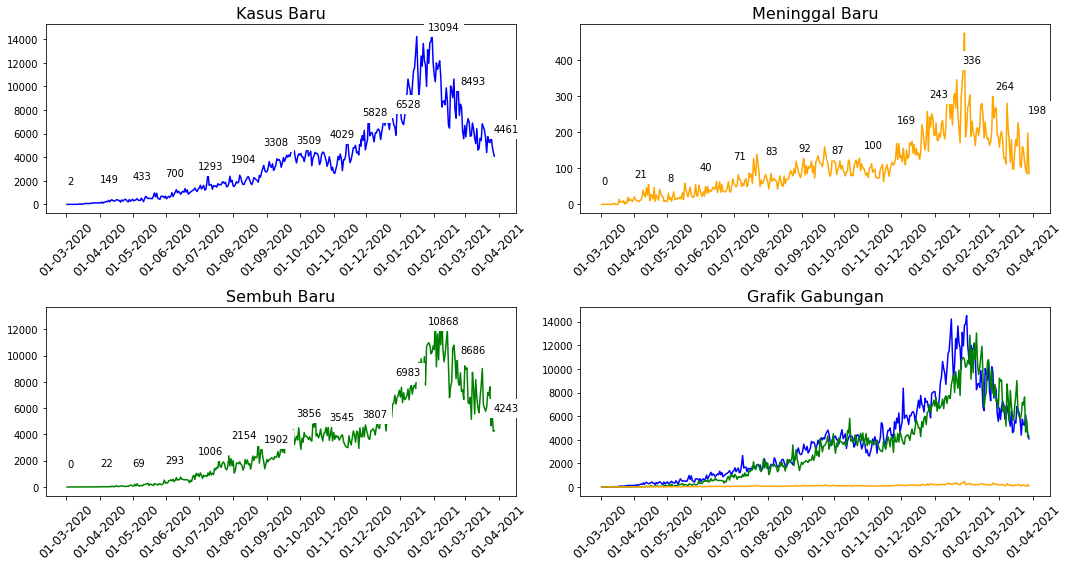

In [60]:
# Grafik Kasus Baru

fig, ax = plt.subplots(2,2,figsize=(15,8))
ax[0,0].plot(dates, data_idn['New Cases'], color='blue')
ax[0,0].set_title('Kasus Baru', fontsize=16)
ax[0,0].xaxis.set_tick_params(rotation=45, labelsize=12)
ax[0,0].xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
ax[0,0].xaxis.set_major_locator(MonthLocator())
for i,j in list(zip(dates,data_idn['New Cases']))[::30]:
    ax[0,0].annotate(str(j),xy=(i,j),xytext=(0,20),backgroundcolor="w",textcoords="offset pixels")

ax[1,0].plot(dates, data_idn['New Recovered'], color='green')
ax[1,0].set_title('Sembuh Baru', fontsize=16)
ax[1,0].xaxis.set_tick_params(rotation=45, labelsize=12)
ax[1,0].xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
ax[1,0].xaxis.set_major_locator(MonthLocator())
for i,j in list(zip(dates,data_idn['New Recovered']))[::30]:
    ax[1,0].annotate(str(j),xy=(i,j),xytext=(0,20),backgroundcolor="w",textcoords="offset pixels")

ax[0,1].plot(dates, data_idn['New Deaths'], color='orange')
ax[0,1].set_title('Meninggal Baru', fontsize=16)
ax[0,1].xaxis.set_tick_params(rotation=45, labelsize=12)
ax[0,1].xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
ax[0,1].xaxis.set_major_locator(MonthLocator())
for i,j in list(zip(dates,data_idn['New Deaths']))[::30]:
    ax[0,1].annotate(str(j),xy=(i,j),xytext=(0,20),backgroundcolor="w",textcoords="offset pixels")

ax[1,1].plot(dates, data_idn['New Cases'], color='blue')
ax[1,1].plot(dates, data_idn['New Recovered'], color='green')
ax[1,1].plot(dates, data_idn['New Deaths'], color='orange')
ax[1,1].set_title('Grafik Gabungan', fontsize=16)
ax[1,1].xaxis.set_tick_params(rotation=45, labelsize=12)
ax[1,1].xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
ax[1,1].xaxis.set_major_locator(MonthLocator())

fig.tight_layout()
plt.show()


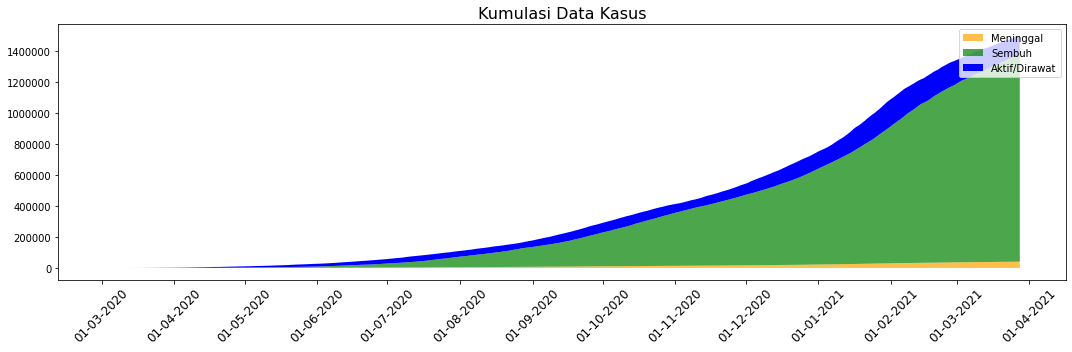

In [61]:
# Tampilan Kumulatif

fig, ax = plt.subplots(figsize=(15,5))
y_stack = [
    data_idn['Total Deaths'],
    data_idn['Total Deaths'] + data_idn['Total Recovered'],
    data_idn['Total Cases'],
]
ax.fill_between(dates, 0, y_stack[0], facecolor="orange", alpha=.7)
ax.fill_between(dates, y_stack[0], y_stack[1], facecolor="green", alpha=.7)
ax.fill_between(dates, y_stack[1], y_stack[2], facecolor="blue")
ax.set_title('Kumulasi Data Kasus', fontsize=16)
plt.ticklabel_format(style = 'plain')
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
ax.xaxis.set_tick_params(rotation=45, labelsize=12)
ax.xaxis.set_major_locator(MonthLocator())
ax.legend(['Meninggal', 'Sembuh', 'Aktif/Dirawat'])

fig.tight_layout()
plt.show()

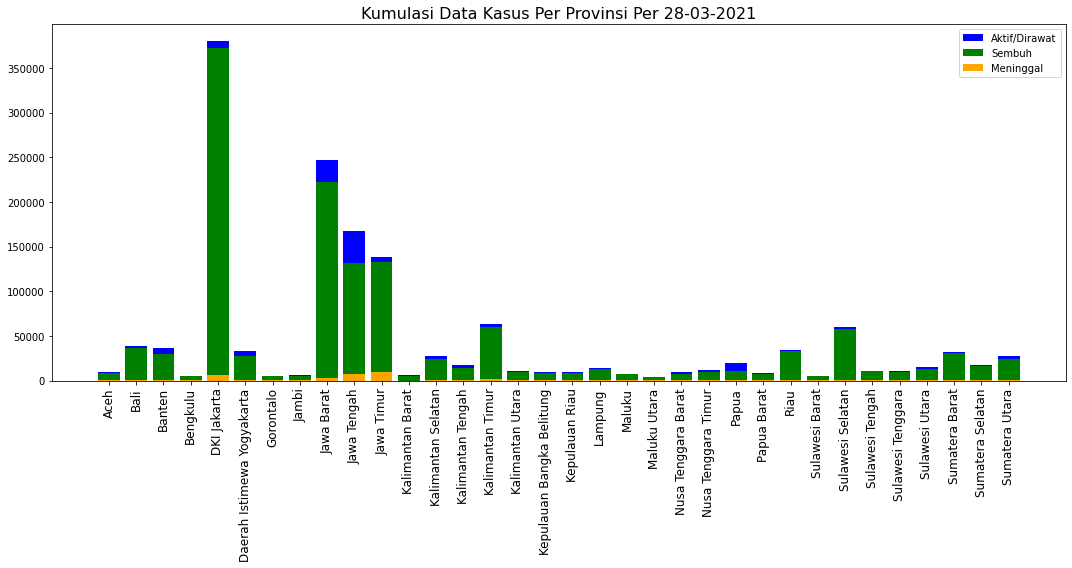

In [62]:
fig, ax = plt.subplots(figsize=(15,8))
y_stack = [
    data_new['Total Deaths'],
    data_new['Total Recovered'] + data_new['Total Deaths'],
    data_new['Total Cases'],
]

ax.bar(data_new['Location'], y_stack[2], facecolor="blue")
ax.bar(data_new['Location'], y_stack[1], facecolor="green")
ax.bar(data_new['Location'], y_stack[0], facecolor="orange")
ax.set_title('Kumulasi Data Kasus Per Provinsi Per '+  date2.strftime('%d-%m-%Y'), fontsize=16)
ax.xaxis.set_tick_params(rotation=90, labelsize=12)
# ax.set_yscale('log')
ax.legend([ 'Aktif/Dirawat', 'Sembuh','Meninggal'])

fig.tight_layout()
plt.show()

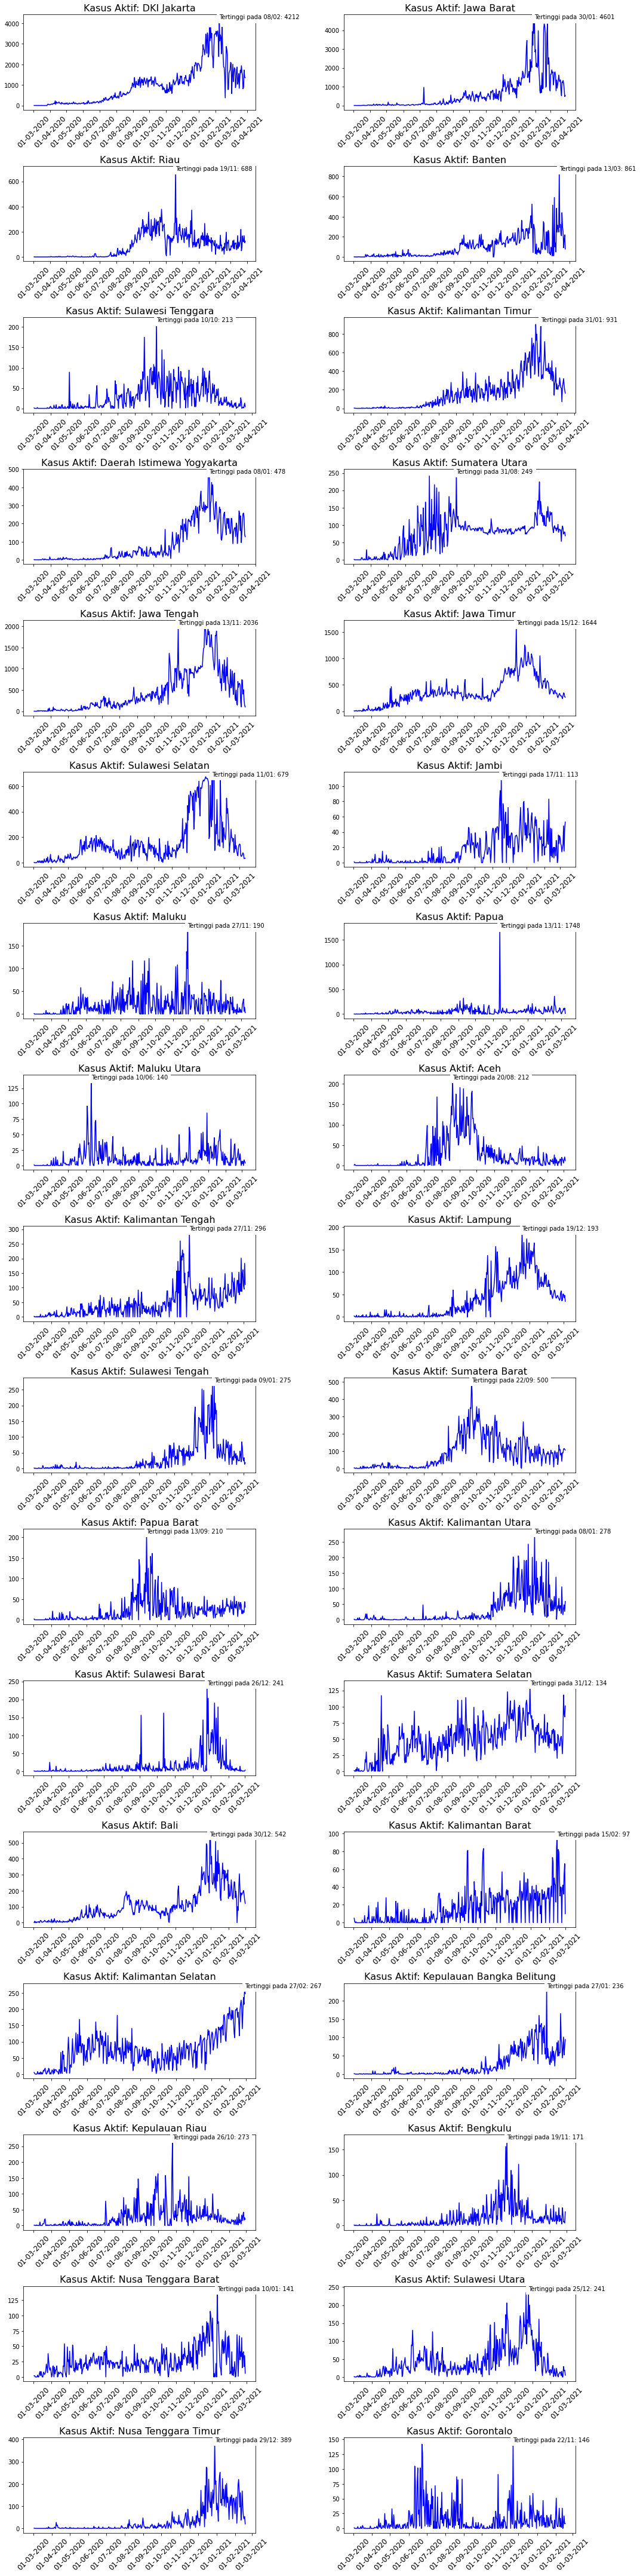

In [100]:
# Plot per propinsi
provinsis = pd.unique(data['Location'])
provinsis = provinsis[provinsis != 'Indonesia']
fig, ax = plt.subplots(provinsis.shape[0]//2,2,figsize=(15,60))
for i, prov in enumerate(provinsis):
    X, Y = i // 2, i % 2
    data_reg = data[data['Location'] == prov]
    maxcount = min(dates.shape[0],data_reg['New Cases'].shape[0])
    data_reg = data_reg['New Cases'][0:maxcount]
    ax[X,Y].plot(dates[0:maxcount], data_reg, color='blue')
    ax[X,Y].set_title('Kasus Aktif: '+prov, fontsize=16)
    ax[X,Y].xaxis.set_tick_params(rotation=45, labelsize=12)
    ax[X,Y].xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
    ax[X,Y].xaxis.set_major_locator(MonthLocator())
    # tertinggi
    data_reg_list = data_reg.tolist()
    highest = max(data_reg_list)
    highestidx = data_reg_list.index(highest)
    higheststr = 'Tertinggi pada ' + num2date(dates[highestidx]).strftime('%d/%m') + ': '+ str(highest)
    ax[X,Y].annotate(higheststr,xy=(dates[highestidx],highest),xytext=(0,0),backgroundcolor="w",textcoords="offset pixels")
    

fig.tight_layout()
plt.show()